In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
from sklearn.model_selection import train_test_split
import statsmodels.api as sm

In [2]:
data = pd.read_csv("train.csv")

In [3]:
data.head()

,POSTED_BY,UNDER_CONSTRUCTION,RERA,BHK_NO.,BHK_OR_RK,SQUARE_FT,READY_TO_MOVE,RESALE,ADDRESS,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
0,Owner,0,0,2,BHK,1300.236407,1,1,"Ksfc Layout,Bangalore",12.969910,77.597960,55.0
1,Dealer,0,0,2,BHK,1275.000000,1,1,"Vishweshwara Nagar,Mysore",12.274538,76.644605,51.0
2,Owner,0,0,2,BHK,933.159722,1,1,"Jigani,Bangalore",12.778033,77.632191,43.0
3,Owner,0,1,2,BHK,929.921143,1,1,"Sector-1 Vaishali,Ghaziabad",28.642300,77.344500,62.5
4,Dealer,1,0,2,BHK,999.009247,0,1,"New Town,Kolkata",22.592200,88.484911,60.5


In [4]:
data.describe()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
count,29451.000000,29451.000000,29451.000000,2.945100e+04,29451.000000,29451.000000,29451.000000,29451.000000,29451.000000
mean,0.179756,0.317918,2.392279,1.980217e+04,0.820244,0.929578,21.300255,76.837695,142.898746
std,0.383991,0.465675,0.879091,1.901335e+06,0.383991,0.255861,6.205306,10.557747,656.880713
min,0.000000,0.000000,1.000000,3.000000e+00,0.000000,0.000000,-37.713008,-121.761248,0.250000
25%,0.000000,0.000000,2.000000,9.000211e+02,1.000000,1.000000,18.452663,73.798100,38.000000
50%,0.000000,0.000000,2.000000,1.175057e+03,1.000000,1.000000,20.750000,77.324137,62.000000
75%,0.000000,1.000000,3.000000,1.550688e+03,1.000000,1.000000,26.900926,77.828740,100.000000
max,1.000000,1.000000,20.000000,2.545455e+08,1.000000,1.000000,59.912884,152.962676,30000.000000


In [5]:
data.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


In [6]:
data.isnull().sum()

POSTED_BY                0
UNDER_CONSTRUCTION       0
RERA                     0
BHK_NO.                  0
BHK_OR_RK                0
SQUARE_FT                0
READY_TO_MOVE            0
RESALE                   0
ADDRESS                  0
LONGITUDE                0
LATITUDE                 0
TARGET(PRICE_IN_LACS)    0
dtype: int64

There is no Null data

In [7]:
data.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

# Exploratory Data Analysis

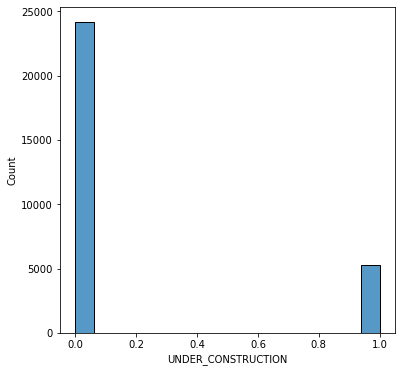

In [8]:
plt.subplots(figsize = (6,6))
sns.histplot(data, x = 'UNDER_CONSTRUCTION')
plt.show()

So , Under Construction houses are less 

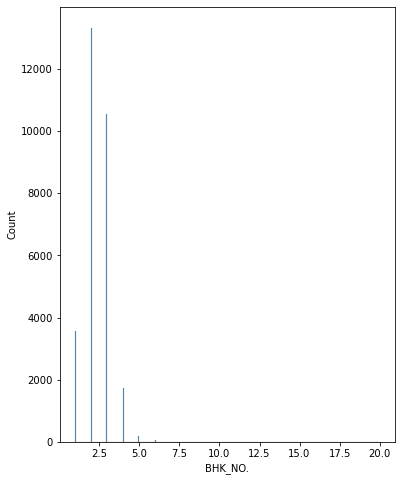

In [9]:
plt.subplots(figsize = (6,8))
sns.histplot(data,x='BHK_NO.')
plt.show()

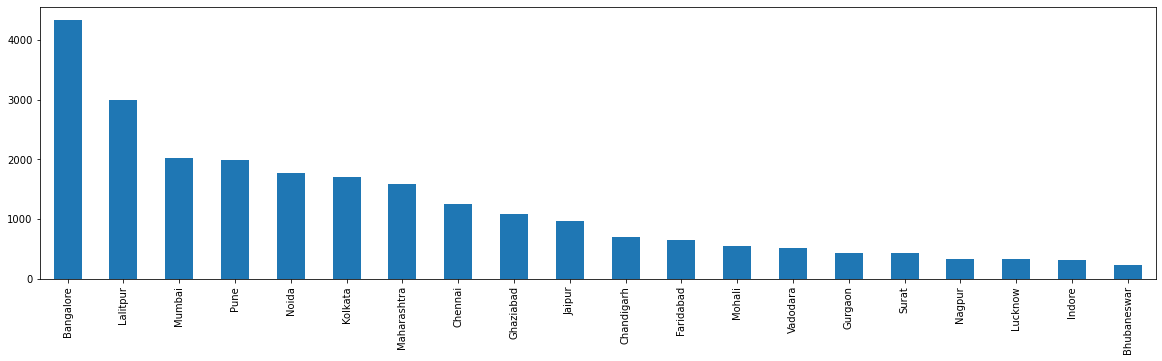

In [10]:
plt.figure(figsize=(20 ,5))
data.ADDRESS = data.ADDRESS.apply(lambda x: x.split(',')[-1])
data.ADDRESS.value_counts()[:20].plot(kind='bar')
plt.show()

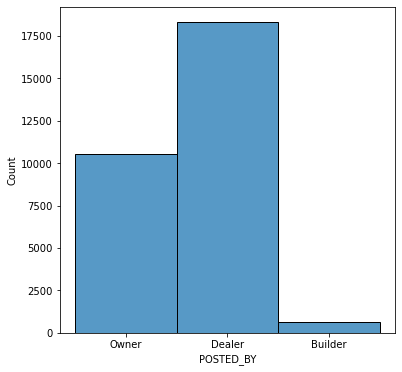

In [40]:
plt.subplots(figsize=(6,6))
sns.histplot(data=data,x='POSTED_BY')
plt.show()

Most of the people sell their property with the help of dealer

Banglore has the most properties

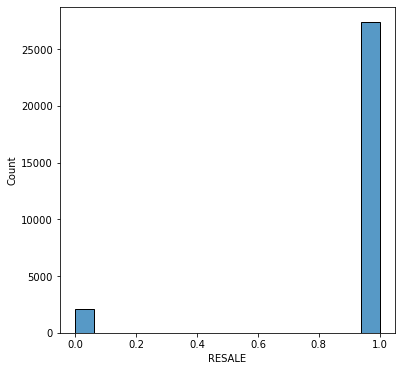

In [18]:
plt.subplots(figsize=(6,6))
sns.histplot(data=data,x='RESALE')
plt.show()

Most of the properties are old.

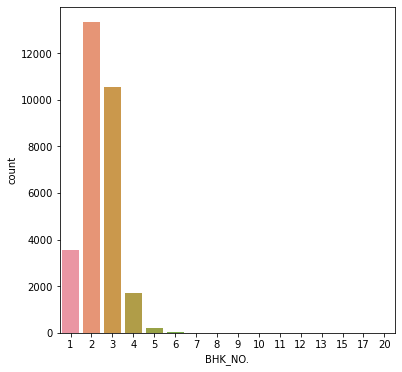

In [35]:
plt.subplots(figsize=(6,6))
sns.countplot(data=data,x='BHK_NO.')
plt.show()

Most of the properties are of 2bhk

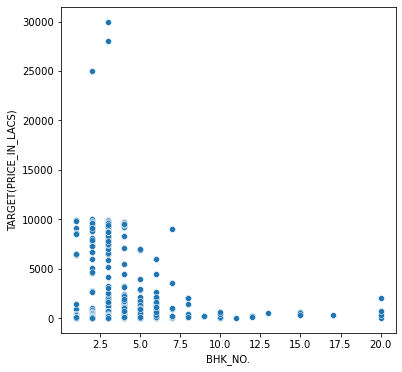

In [36]:
plt.subplots(figsize=(6,6))
sns.scatterplot(x='BHK_NO.',y='TARGET(PRICE_IN_LACS)',data=data)
plt.show()

In [37]:
data.corr()

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS)
UNDER_CONSTRUCTION,1.000000,0.363826,-0.040712,-0.004204,-1.000000,-0.347405,0.006440,-0.000381,0.055399
RERA,0.363826,1.000000,0.009547,-0.006229,-0.363826,-0.270351,0.104976,-0.065106,0.067636
BHK_NO.,-0.040712,0.009547,1.000000,0.005303,0.040712,0.014581,0.068730,0.046930,0.112283
SQUARE_FT,-0.004204,-0.006229,0.005303,1.000000,0.004204,0.001732,-0.012591,0.000803,0.402685
READY_TO_MOVE,-1.000000,-0.363826,0.040712,0.004204,1.000000,0.347405,-0.006440,0.000381,-0.055399
RESALE,-0.347405,-0.270351,0.014581,0.001732,0.347405,1.000000,0.024038,0.014844,-0.207378
LONGITUDE,0.006440,0.104976,0.068730,-0.012591,-0.006440,0.024038,1.000000,-0.155062,-0.031112
LATITUDE,-0.000381,-0.065106,0.046930,0.000803,0.000381,0.014844,-0.155062,1.000000,-0.017254
TARGET(PRICE_IN_LACS),0.055399,0.067636,0.112283,0.402685,-0.055399,-0.207378,-0.031112,-0.017254,1.000000


Linear Regression

Setting Target and Source

In [51]:
data.dtypes

POSTED_BY                 object
UNDER_CONSTRUCTION         int64
RERA                       int64
BHK_NO.                    int64
BHK_OR_RK                 object
SQUARE_FT                float64
READY_TO_MOVE              int64
RESALE                     int64
ADDRESS                   object
LONGITUDE                float64
LATITUDE                 float64
TARGET(PRICE_IN_LACS)    float64
dtype: object

In [41]:
y = data['TARGET(PRICE_IN_LACS)']

In [54]:
x = data.drop(columns=['TARGET(PRICE_IN_LACS)','ADDRESS','POSTED_BY','BHK_OR_RK'])

Scaling Data

In [56]:
scaledX = scale.fit_transform(x)

Train Test Split

In [57]:
train_x , test_x , train_y , test_y = train_test_split(x, y,test_size=0.3, random_state=42)

Linear Regression

In [58]:
reg = linear_model.LinearRegression()

In [59]:
reg.fit(train_x,train_y)

LinearRegression()

In [60]:
reg.coef_

array([-1.18645981e+01,  2.49909328e+01,  8.66209823e+01,  1.10568213e-04,
        1.18645981e+01, -5.60086042e+02, -3.50267378e+00, -1.40811485e+00])

In [62]:
reg.intercept_

622.8682101305653

In [63]:
reg.score(train_x,train_y)

0.15838540109148636

In [64]:
reg.score(test_x,test_y)

0.32730101771092146

Loading Test Data

In [65]:
testData = pd.read_csv("test.csv")

In [68]:
testData = testData.drop(columns=['ADDRESS','POSTED_BY','BHK_OR_RK'])

In [69]:
testData = scale.fit_transform(testData)

In [71]:
Prediction = reg.predict(testData)

In [72]:
Prediction

array([ 328.82951731, 2669.72606271,  426.11299863, ..., 2569.41372812,
        430.46202887,  530.44158517])